### Import Required Libraries

In [2]:
## import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


### Import Dataset

In [3]:
## Importing the data set
dataset = pd.read_csv('bank-full.csv', delimiter=';')




### Show First 10 Rows

In [4]:
# Show first 10 rows
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
# Show last 10 rows
dataset.tail(10)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Show Shape of Dataframe

In [6]:
# Show shape and columns
pd.DataFrame({'Shape': [dataset.shape], 'Columns': [dataset.columns.tolist()]})



,Shape,Columns
0,"(45211, 17)","[age, job, marital, education, default, balanc..."


### Show Data Types

In [7]:
# Show data types
pd.DataFrame(dataset.dtypes, columns=['Data Type'])



,Data Type
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


### Show Summary Statistics

In [8]:
# Show summary statistics
dataset.describe(include='all').T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


### Check for Duplicates & Missing Values

In [9]:
# Check for duplicate rows
duplicate_count = dataset.duplicated().sum()
print(f'Total duplicate rows: {duplicate_count}')
if duplicate_count > 0:
    display(dataset[dataset.duplicated()])

Total duplicate rows: 0


In [10]:
# Check for missing values
dataset.isnull().sum().to_frame('Missing Values')

,Missing Values
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


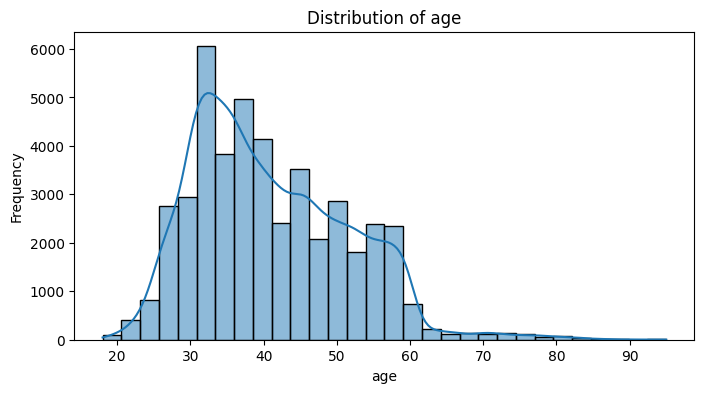

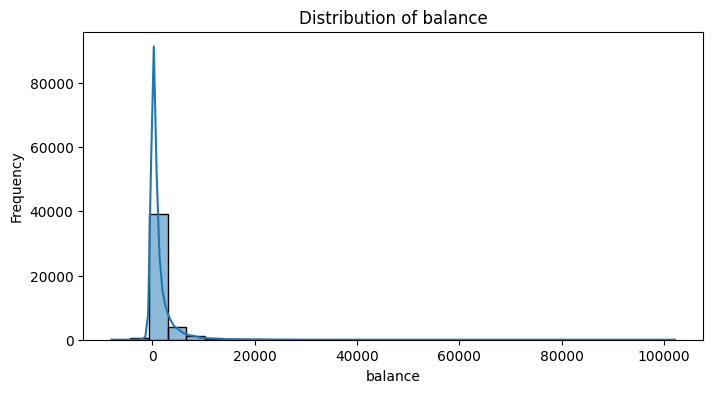

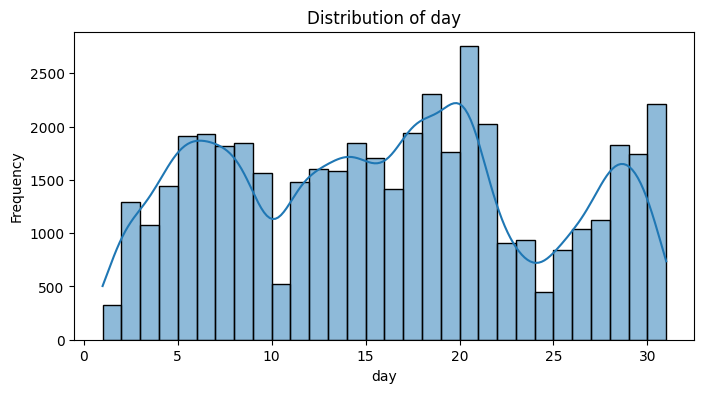

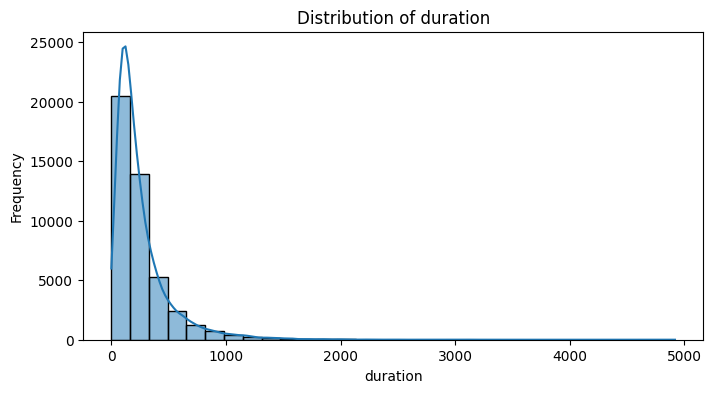

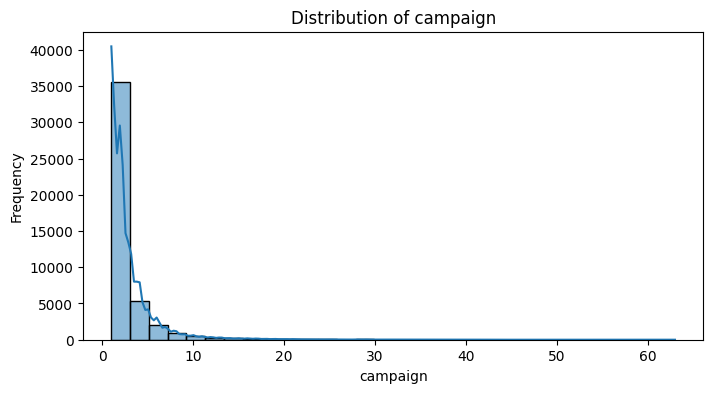

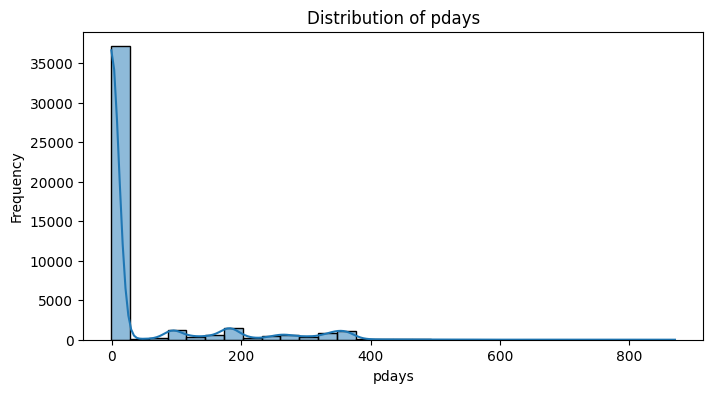

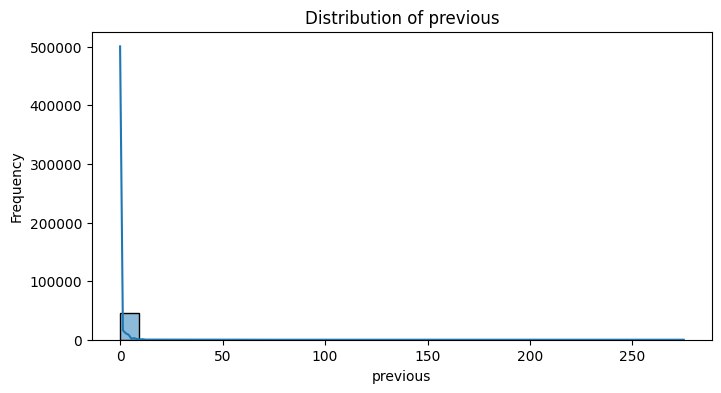

In [11]:
# Analyze distribution of key features
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features distribution
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



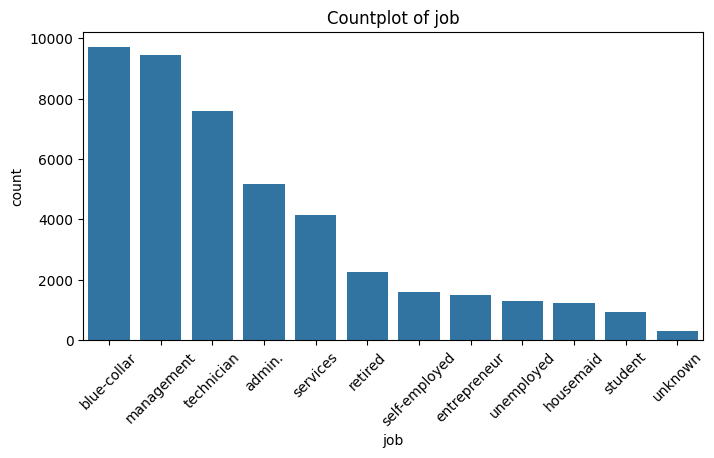

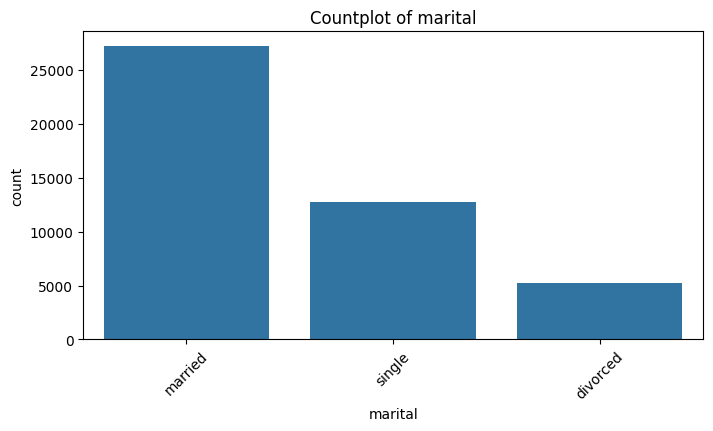

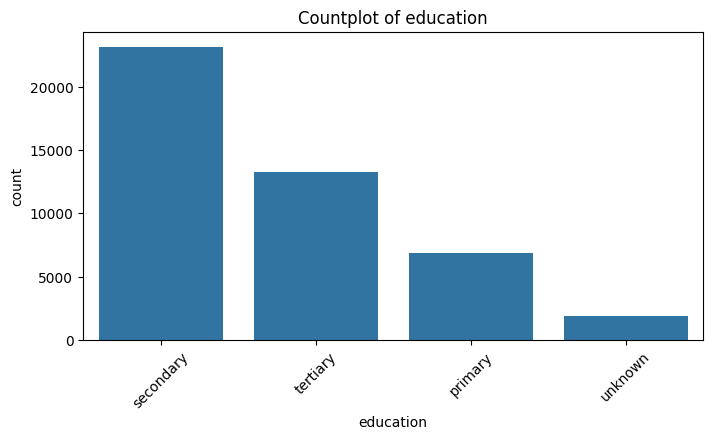

In [12]:
# Categorical features distribution (top 3 by cardinality)
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols[:3]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

### # Check for target class imbalance (y variable)

Class counts:
y
no     39922
yes     5289
Name: count, dtype: int64

Class percentages:
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


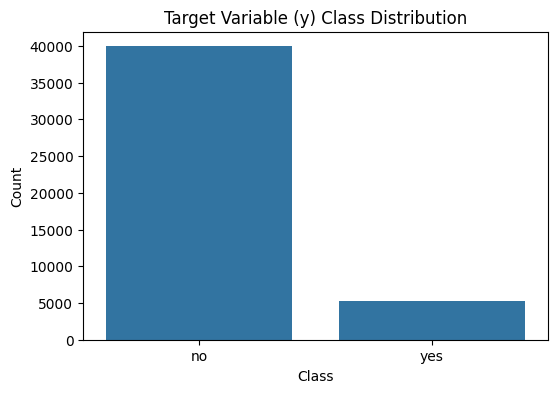

In [13]:

y_counts = dataset['y'].value_counts()
y_percent = dataset['y'].value_counts(normalize=True) * 100
print('Class counts:')
print(y_counts)
print('\nClass percentages:')
print(y_percent)

plt.figure(figsize=(6,4))
sns.countplot(x='y', data=dataset, order=y_counts.index)
plt.title('Target Variable (y) Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Resolve class imbalance

### Chatting the Visualizations

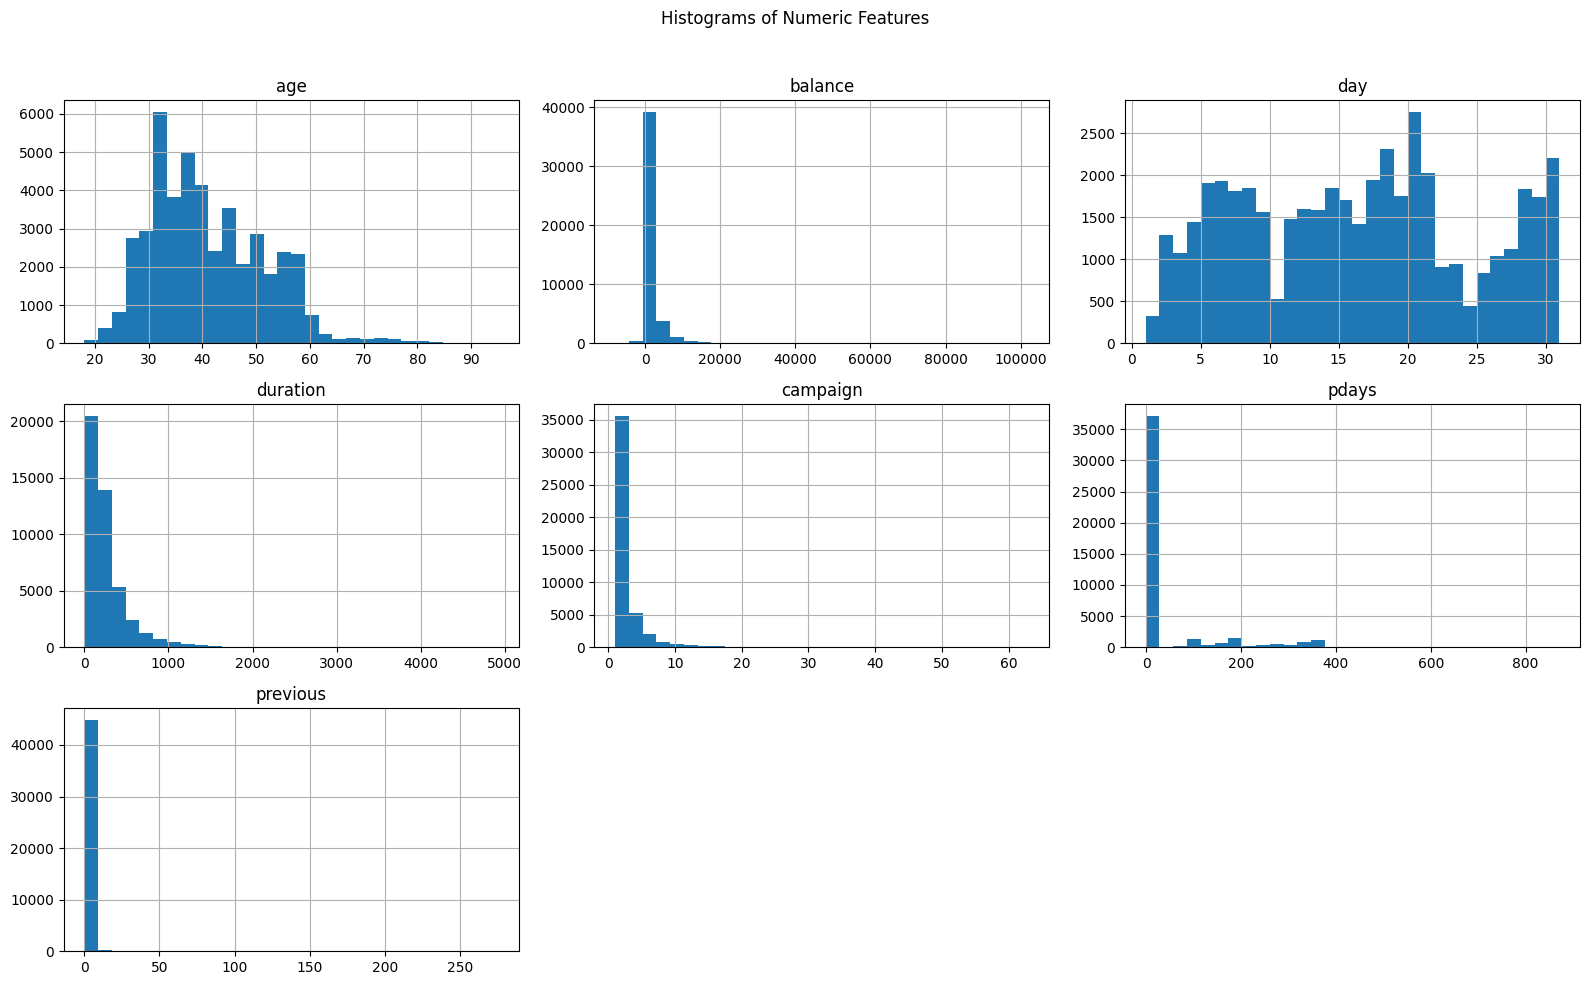

In [14]:
# Summarize insights with visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all numeric features
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset[numeric_cols].hist(figsize=(16, 10), bins=30)
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



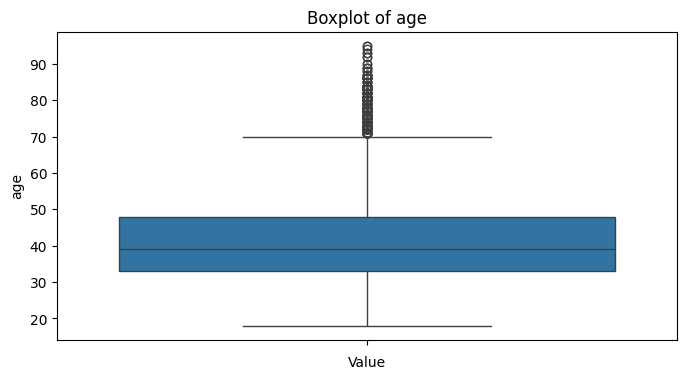

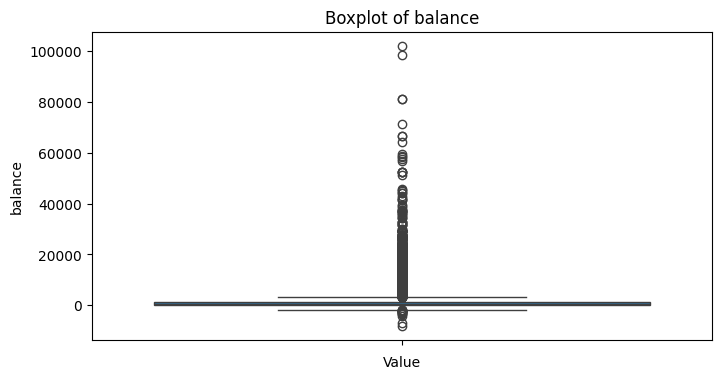

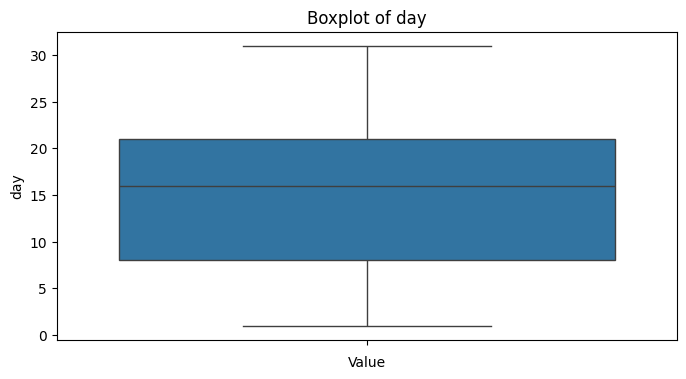

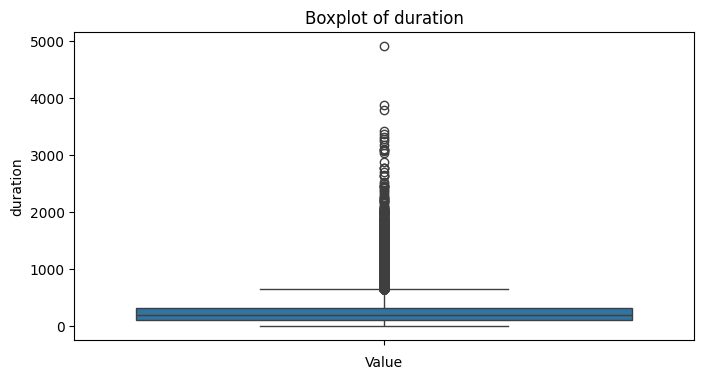

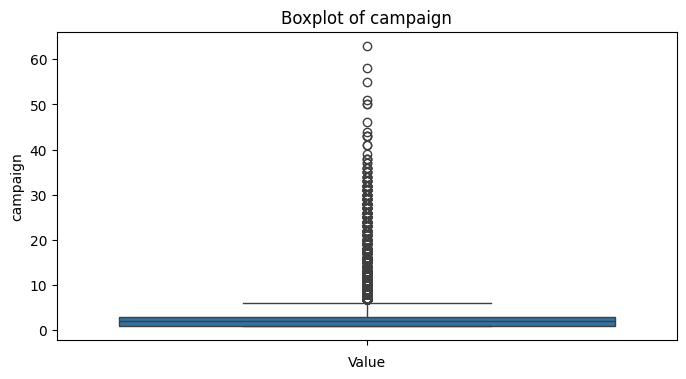

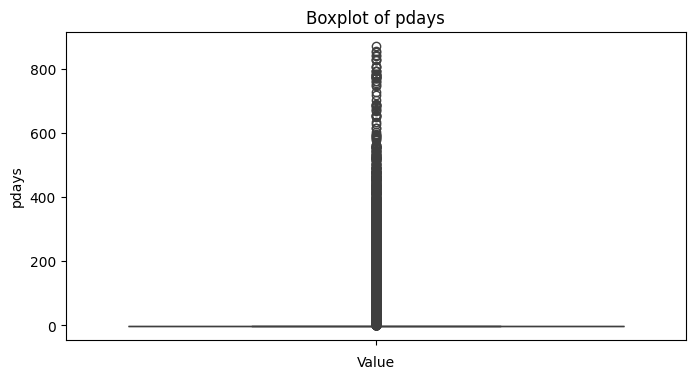

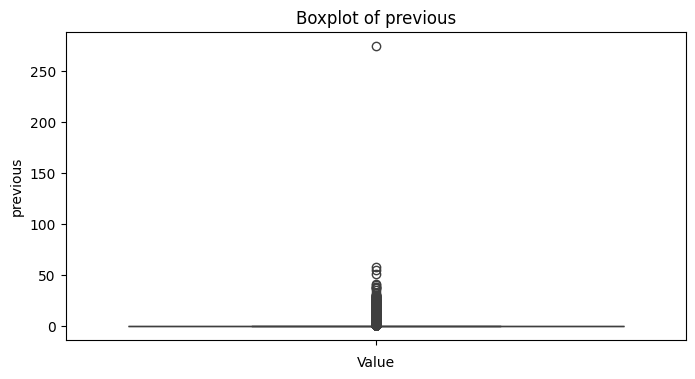

In [15]:
# Boxplots for individual numeric features (vertical, with axis labels and rotated x-axis labels)
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel('Value')
    plt.xticks(rotation=90)
    plt.show()

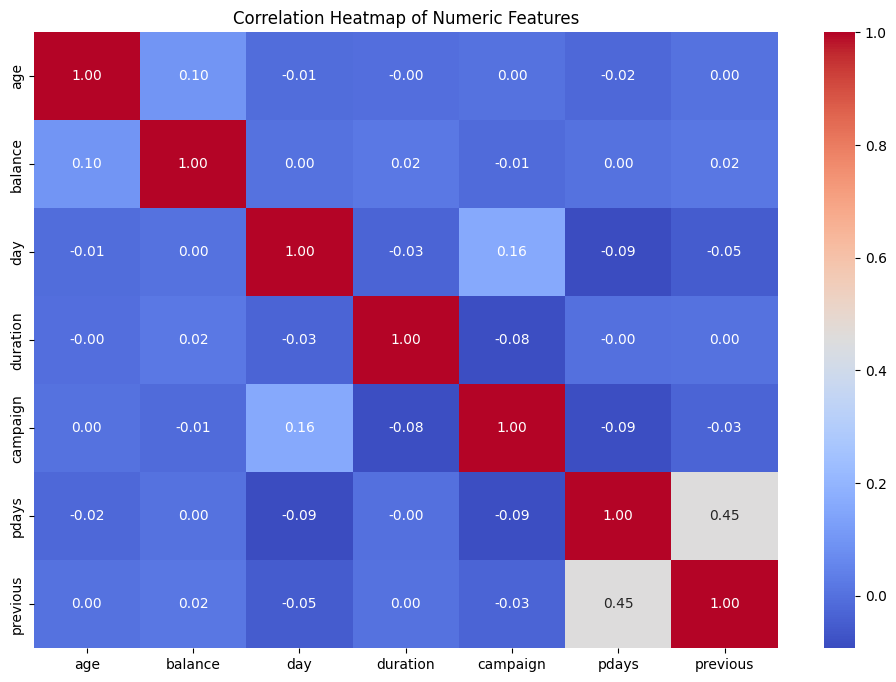

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = dataset[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Multicolleneality

In [17]:
# Identify multicollinear features and suggest dropping them
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure df_encoded is defined (fallback to dataset if not present)
try:
    df_encoded
except NameError:
    df_encoded = dataset.copy()

# Select only numeric features from the encoded DataFrame (no engineered features)
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr().abs()
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if col1 != col2 and corr_matrix.loc[col1, col2] > 0.8]

print('Highly correlated feature pairs (correlation > 0.8):')
for pair in set(tuple(sorted(x)) for x in high_corr_pairs):
    print(pair)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
print('\nVariance Inflation Factor (VIF) for each feature:')
print(vif_data)

# Suggest dropping features with VIF > 10
drop_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
print(f'\nSuggested features to drop (VIF > 10): {drop_features}')

# Create new DataFrame with dropped features
df_reduced = df_encoded.drop(columns=drop_features)
print('\nNew DataFrame shape:', df_reduced.shape)
df_reduced.head()

Highly correlated feature pairs (correlation > 0.8):

Variance Inflation Factor (VIF) for each feature:
    feature       VIF
0       age  5.004058
1   balance  1.212908
2       day  3.984268
3  duration  1.901309
4  campaign  1.824694
5     pdays  1.454202
6  previous  1.341641

Suggested features to drop (VIF > 10): []

New DataFrame shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
# Move target column 'y' to the end of the DataFrame
def move_target_to_end(df, target_col='y'):
    cols = [col for col in df.columns if col != target_col] + [target_col]
    return df[cols]

df_reduced = move_target_to_end(df_reduced, 'y')
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Skewness of Data

In [19]:
skewness = df_reduced.select_dtypes(include=['int64', 'float64']).skew().to_frame('Skewness')
display(skewness)

,Skewness
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


In [20]:
# Apply Yeo-Johnson transformation to skewed features with negative values
from sklearn.preprocessing import PowerTransformer

# Identify skewed features (absolute skewness > 0.75)
skewness = df_reduced.select_dtypes(include=['int64', 'float64']).skew()
skewed_feats = skewness[skewness.abs() > 0.75].index.tolist()

df_yeojohnson = df_reduced.copy()
pt = PowerTransformer(method='yeo-johnson')
df_yeojohnson[skewed_feats] = pt.fit_transform(df_yeojohnson[skewed_feats])

# Move y to the end column
cols = [c for c in df_yeojohnson.columns if c != 'y'] + ['y']
df_yeojohnson = df_yeojohnson[cols]

# Show first 5 rows of the transformed DataFrame
df_yeojohnson.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,0.414773,yes,no,unknown,5,may,0.386077,-1.108191,-0.472533,-0.4725,unknown,no
1,44,technician,single,secondary,no,-0.410774,yes,no,unknown,5,may,-0.223033,-1.108191,-0.472533,-0.4725,unknown,no
2,33,entrepreneur,married,secondary,no,-0.431122,yes,yes,unknown,5,may,-0.923854,-1.108191,-0.472533,-0.4725,unknown,no
3,47,blue-collar,married,unknown,no,0.197685,yes,no,unknown,5,may,-0.735678,-1.108191,-0.472533,-0.4725,unknown,no
4,33,unknown,single,unknown,no,-0.432119,no,no,unknown,5,may,0.072812,-1.108191,-0.472533,-0.4725,unknown,no


### Scale Numeric Features

In [21]:
# Scale numeric features after Yeo-Johnson transformation
from sklearn.preprocessing import StandardScaler

df_scaled = df_yeojohnson.copy()
numeric_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns.drop('y', errors='ignore')

scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled.head()

# Show first 5 rows of the scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,management,married,tertiary,no,0.414773,yes,no,unknown,-1.298476,may,0.386077,-1.108191,-0.472533,-0.4725,unknown,no
1,0.288529,technician,single,secondary,no,-0.410774,yes,no,unknown,-1.298476,may,-0.223033,-1.108191,-0.472533,-0.4725,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.431122,yes,yes,unknown,-1.298476,may,-0.923854,-1.108191,-0.472533,-0.4725,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.197685,yes,no,unknown,-1.298476,may,-0.735678,-1.108191,-0.472533,-0.4725,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.432119,no,no,unknown,-1.298476,may,0.072812,-1.108191,-0.472533,-0.4725,unknown,no


### Encode Categorical Variables

In [22]:
# Integer encode categorical variables for embeddings, including target 'y'
from sklearn.preprocessing import LabelEncoder

df_encoded = df_scaled.copy()
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Also encode target column 'y' if it is still object type
if df_encoded['y'].dtype == 'object':
    le_y = LabelEncoder()
    df_encoded['y'] = le_y.fit_transform(df_encoded['y'])
    label_encoders['y'] = le_y

# Show first 5 rows of the encoded DataFrame
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,4,1,2,0,0.414773,1,0,2,-1.298476,8,0.386077,-1.108191,-0.472533,-0.4725,3,0
1,0.288529,9,2,1,0,-0.410774,1,0,2,-1.298476,8,-0.223033,-1.108191,-0.472533,-0.4725,3,0
2,-0.747384,2,1,1,0,-0.431122,1,1,2,-1.298476,8,-0.923854,-1.108191,-0.472533,-0.4725,3,0
3,0.571051,1,1,3,0,0.197685,1,0,2,-1.298476,8,-0.735678,-1.108191,-0.472533,-0.4725,3,0
4,-0.747384,11,2,3,0,-0.432119,0,0,2,-1.298476,8,0.072812,-1.108191,-0.472533,-0.4725,3,0


In [23]:
# Show first 5 rows 
df_encoded.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,0.947747,9,1,2,0,-0.052398,0,0,0,0.143418,9,2.057767,0.737650,-0.472533,-0.472500,3,1
45207,2.831227,5,0,0,0,0.275122,0,0,0,0.143418,9,1.056254,0.134537,-0.472533,-0.472500,3,1
45208,2.925401,5,1,1,0,1.495765,0,0,0,0.143418,9,2.257271,1.323745,2.122381,2.166630,2,1
45209,1.512791,1,1,1,0,-0.114235,0,0,1,0.143418,9,1.191963,1.091724,-0.472533,-0.472500,3,0
45210,-0.370689,2,1,1,0,0.681838,0,0,0,0.143418,9,0.769421,0.134537,2.123051,2.175519,1,0


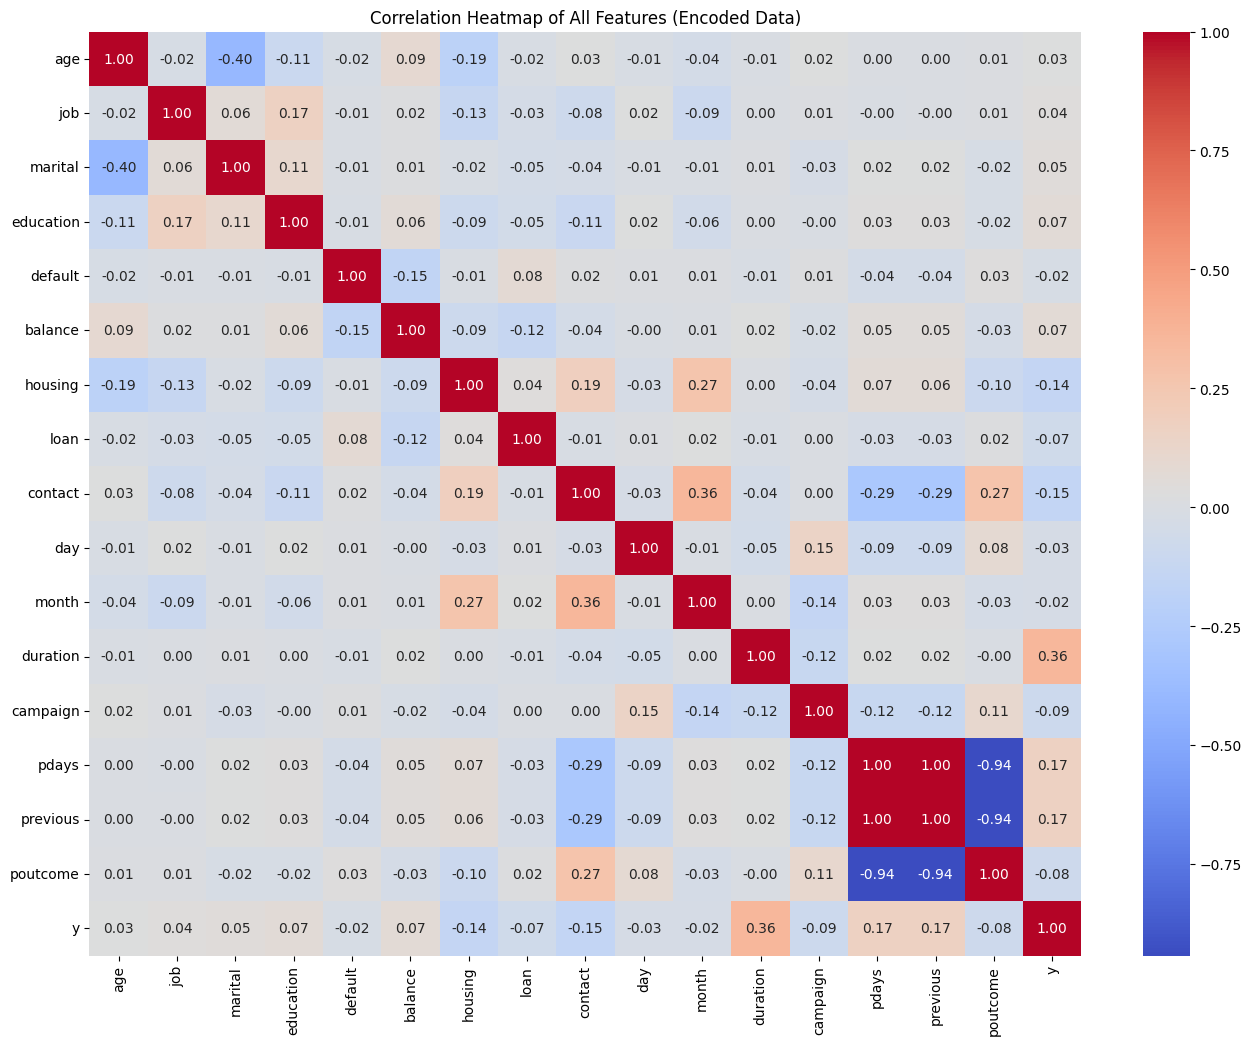

In [24]:
# Correlation heatmap for all features in the encoded training set (including target)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine features and target into one DataFrame for correlation
df_encoded_corr = df_encoded.copy()

plt.figure(figsize=(16, 12))
corr_matrix = df_encoded_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features (Encoded Data)')
plt.show()

In [25]:
# Calculate VIF and drop features with VIF > 10 (using encoded data)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric features (excluding target 'y')
numeric_df = df_encoded.drop('y', axis=1).select_dtypes(include=['int64', 'float64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
print('Variance Inflation Factor (VIF) for each feature:')
print(vif_data)

# Suggest dropping features with VIF > 10
drop_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
print(f'\nSuggested features to drop (VIF > 10): {drop_features}')

# Create new DataFrame with dropped features
df_encoded_reduced = df_encoded.drop(columns=drop_features)
print('\nNew DataFrame shape:', df_encoded_reduced.shape)
df_encoded_reduced.head()

Variance Inflation Factor (VIF) for each feature:
    feature         VIF
0       age    1.010331
1   balance    1.011891
2       day    1.028493
3  duration    1.017051
4  campaign    1.049007
5     pdays  653.064582
6  previous  652.894022

Suggested features to drop (VIF > 10): ['pdays', 'previous']

New DataFrame shape: (45211, 15)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,1.606965,4,1,2,0,0.414773,1,0,2,-1.298476,8,0.386077,-1.108191,3,0
1,0.288529,9,2,1,0,-0.410774,1,0,2,-1.298476,8,-0.223033,-1.108191,3,0
2,-0.747384,2,1,1,0,-0.431122,1,1,2,-1.298476,8,-0.923854,-1.108191,3,0
3,0.571051,1,1,3,0,0.197685,1,0,2,-1.298476,8,-0.735678,-1.108191,3,0
4,-0.747384,11,2,3,0,-0.432119,0,0,2,-1.298476,8,0.072812,-1.108191,3,0


In [26]:
# Drop 'age' from the encoded DataFrame and use the new DataFrame going forward
df_encoded = df_encoded.drop(columns=['age'])
print('Columns after dropping age:', df_encoded.columns.tolist())

Columns after dropping age: ['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']



### Split dataset into train/val/test with stratification

In [27]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# First split: train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: train and val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
# This gives 60% train, 20% val, 20% test

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

Train: (27126, 15) Val: (9042, 15) Test: (9043, 15)


### Resolve class imbalance

In [28]:
# Resolve class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('Resampled training set shape:', X_train_resampled.shape, y_train_resampled.shape)

Resampled training set shape: (47906, 15) (47906,)


In [29]:
# Print the number of 'yes' and 'no' samples after SMOTE
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after SMOTE:")
for label, count in zip(unique, counts):
    print(f"{label} ({'yes' if label == 1 else 'no'}): {count}")

Class distribution after SMOTE:
0 (no): 23953
1 (yes): 23953


### Convert into TensorFlow tf.data pipelines

In [30]:
import tensorflow as tf

# Convert train, val, test splits to tf.data.Dataset

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

# Shuffle and batch datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train_resampled)).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Preview a batch
for features, labels in train_dataset.take(1):
    print('Features shape:', features.shape)
    print('Labels shape:', labels.shape)


Features shape: (32, 15)
Labels shape: (32,)
Features shape: (32, 15)
Labels shape: (32,)


In [31]:
# Baseline Feedforward Neural Network (FFNN) with ReLU, Dropout, BatchNorm
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Use reduced encoded features for training
X_train_nn = X_train_resampled
y_train_nn = y_train_resampled
X_val_nn = X_val.values
y_val_nn = y_val.values
X_test_nn = X_test.values
y_test_nn = y_test.values

input_dim = X_train_nn.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=20, batch_size=32)

# Predict and evaluate on test set
y_pred_prob = model.predict(X_test_nn).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
auc = roc_auc_score(y_test_nn, y_pred_prob)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test AUC: {auc:.4f}")




Epoch 1/20
Epoch 1/20




1498/1498 [==============================] - 3s 2ms/step - loss: 0.4149 - accuracy: 0.8156 - val_loss: 0.4165 - val_accuracy: 0.7964
Epoch 2/20
1498/1498 [==============================] - 3s 2ms/step - loss: 0.4149 - accuracy: 0.8156 - val_loss: 0.4165 - val_accuracy: 0.7964
Epoch 2/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3785 - accuracy: 0.8377 - val_loss: 0.3860 - val_accuracy: 0.8114
Epoch 3/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3785 - accuracy: 0.8377 - val_loss: 0.3860 - val_accuracy: 0.8114
Epoch 3/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3723 - accuracy: 0.8395 - val_loss: 0.3661 - val_accuracy: 0.8221
Epoch 4/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3723 - accuracy: 0.8395 - val_loss: 0.3661 - val_accuracy: 0.8221
Epoch 4/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3695 - accuracy: 0.8412 - val_loss: 0.40

In [32]:
# Tuned FFNN with regularization, early stopping, and learning rate scheduler
from tensorflow.keras import regularizers, callbacks, optimizers

# Hyperparameters
num_layers = 3
neurons = [128, 64, 32]
dropout_rates = [0.4, 0.3, 0.2]
learning_rate = 0.001
batch_size = 64
l2_lambda = 0.001

input_dim = X_train_nn.shape[1]

model_tuned = models.Sequential()
model_tuned.add(layers.Input(shape=(input_dim,)))
for i in range(num_layers):
    model_tuned.add(layers.Dense(neurons[i], kernel_regularizer=regularizers.l2(l2_lambda)))
    model_tuned.add(layers.BatchNormalization())
    model_tuned.add(layers.ReLU())
    model_tuned.add(layers.Dropout(dropout_rates[i]))
model_tuned.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=learning_rate)
model_tuned.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1)

history_tuned = model_tuned.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=50,
    batch_size=batch_size,
    callbacks=[early_stop, lr_scheduler]
    )

# Predict and evaluate on test set
y_pred_prob_tuned = model_tuned.predict(X_test_nn).flatten()
y_pred_tuned = (y_pred_prob_tuned > 0.5).astype(int)

acc_tuned = accuracy_score(y_test_nn, y_pred_tuned)
prec_tuned = precision_score(y_test_nn, y_pred_tuned)
rec_tuned = recall_score(y_test_nn, y_pred_tuned)
f1_tuned = f1_score(y_test_nn, y_pred_tuned)
auc_tuned = roc_auc_score(y_test_nn, y_pred_prob_tuned)

print(f"Tuned Test Accuracy: {acc_tuned:.4f}")
print(f"Tuned Test Precision: {prec_tuned:.4f}")
print(f"Tuned Test Recall: {rec_tuned:.4f}")
print(f"Tuned Test F1-score: {f1_tuned:.4f}")
print(f"Tuned Test AUC: {auc_tuned:.4f}")

Epoch 1/50
749/749 [==============================] - 3s 2ms/step - loss: 0.5615 - accuracy: 0.7984 - val_loss: 0.4833 - val_accuracy: 0.8025 - lr: 0.0010
Epoch 2/50
749/749 [==============================] - 3s 2ms/step - loss: 0.5615 - accuracy: 0.7984 - val_loss: 0.4833 - val_accuracy: 0.8025 - lr: 0.0010
Epoch 2/50
749/749 [==============================] - 2s 2ms/step - loss: 0.4500 - accuracy: 0.8364 - val_loss: 0.4354 - val_accuracy: 0.8079 - lr: 0.0010
Epoch 3/50
749/749 [==============================] - 2s 2ms/step - loss: 0.4500 - accuracy: 0.8364 - val_loss: 0.4354 - val_accuracy: 0.8079 - lr: 0.0010
Epoch 3/50
749/749 [==============================] - 2s 2ms/step - loss: 0.4151 - accuracy: 0.8405 - val_loss: 0.4130 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 4/50
749/749 [==============================] - 2s 2ms/step - loss: 0.4151 - accuracy: 0.8405 - val_loss: 0.4130 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 4/50
749/749 [==============================] - 2s 2ms/step - lo

4/4 [==============================] - 0s 1ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

6494/6494 [==============================] - 4s 681us/step


  1%|          | 1/100 [00:06<10:37,  6.44s/it]

6494/6494 [==============================] - 4s 673us/step


  2%|▏         | 2/100 [00:12<10:13,  6.26s/it]

6494/6494 [==============================] - 4s 679us/step


  3%|▎         | 3/100 [00:18<09:57,  6.16s/it]

6494/6494 [==============================] - 4s 682us/step


  4%|▍         | 4/100 [00:24<09:46,  6.11s/it]

6494/6494 [==============================] - 5s 716us/step


  5%|▌         | 5/100 [00:30<09:46,  6.18s/it]

6494/6494 [==============================] - 5s 693us/step


  6%|▌         | 6/100 [00:37<09:38,  6.16s/it]

6494/6494 [==============================] - 4s 674us/step


  7%|▋         | 7/100 [00:43<09:26,  6.09s/it]

6494/6494 [==============================] - 4s 677us/step


  8%|▊         | 8/100 [00:48<09:16,  6.05s/it]

6494/6494 [==============================] - 5s 703us/step


  9%|▉         | 9/100 [00:55<09:14,  6.09s/it]

6494/6494 [==============================] - 4s 683us/step


 10%|█         | 10/100 [01:01<09:05,  6.06s/it]

6494/6494 [==============================] - 4s 669us/step


 11%|█         | 11/100 [01:07<08:55,  6.02s/it]

6494/6494 [==============================] - 4s 669us/step


 12%|█▏        | 12/100 [01:12<08:46,  5.98s/it]

6494/6494 [==============================] - 4s 662us/step


 13%|█▎        | 13/100 [01:18<08:37,  5.95s/it]

6494/6494 [==============================] - 4s 675us/step


 14%|█▍        | 14/100 [01:24<08:33,  5.97s/it]

6494/6494 [==============================] - 4s 670us/step


 15%|█▌        | 15/100 [01:30<08:26,  5.96s/it]

6494/6494 [==============================] - 4s 664us/step


 16%|█▌        | 16/100 [01:36<08:18,  5.93s/it]

6494/6494 [==============================] - 4s 666us/step


 17%|█▋        | 17/100 [01:42<08:16,  5.99s/it]

6494/6494 [==============================] - 4s 661us/step


 18%|█▊        | 18/100 [01:48<08:07,  5.95s/it]

6494/6494 [==============================] - 4s 660us/step


 19%|█▉        | 19/100 [01:54<08:00,  5.93s/it]

6494/6494 [==============================] - 4s 675us/step


 20%|██        | 20/100 [02:00<07:55,  5.94s/it]

6494/6494 [==============================] - 4s 660us/step


 21%|██        | 21/100 [02:06<07:47,  5.92s/it]

6494/6494 [==============================] - 4s 657us/step


 22%|██▏       | 22/100 [02:12<07:39,  5.90s/it]

6494/6494 [==============================] - 4s 663us/step


 23%|██▎       | 23/100 [02:18<07:33,  5.89s/it]

6494/6494 [==============================] - 5s 697us/step


 24%|██▍       | 24/100 [02:24<07:32,  5.96s/it]

6494/6494 [==============================] - 4s 660us/step


 25%|██▌       | 25/100 [02:30<07:25,  5.94s/it]

6494/6494 [==============================] - 5s 723us/step


 26%|██▌       | 26/100 [02:36<07:28,  6.06s/it]

6494/6494 [==============================] - 5s 707us/step


 27%|██▋       | 27/100 [02:42<07:27,  6.13s/it]

6494/6494 [==============================] - 5s 747us/step


 28%|██▊       | 28/100 [02:49<07:29,  6.25s/it]

6494/6494 [==============================] - 5s 695us/step


 29%|██▉       | 29/100 [02:55<07:20,  6.20s/it]

6494/6494 [==============================] - 4s 666us/step


 30%|███       | 30/100 [03:01<07:08,  6.12s/it]

6494/6494 [==============================] - 4s 656us/step


 31%|███       | 31/100 [03:07<06:56,  6.03s/it]

6494/6494 [==============================] - 4s 657us/step


 32%|███▏      | 32/100 [03:12<06:45,  5.97s/it]

6494/6494 [==============================] - 5s 704us/step


 33%|███▎      | 33/100 [03:19<06:43,  6.02s/it]

6494/6494 [==============================] - 4s 668us/step


 34%|███▍      | 34/100 [03:24<06:34,  5.98s/it]

6494/6494 [==============================] - 4s 663us/step


 35%|███▌      | 35/100 [03:30<06:26,  5.94s/it]

6494/6494 [==============================] - 4s 668us/step


 36%|███▌      | 36/100 [03:36<06:20,  5.94s/it]

6494/6494 [==============================] - 4s 660us/step


 37%|███▋      | 37/100 [03:42<06:13,  5.92s/it]

6494/6494 [==============================] - 4s 665us/step


 38%|███▊      | 38/100 [03:48<06:06,  5.91s/it]

6494/6494 [==============================] - 4s 657us/step


 39%|███▉      | 39/100 [03:54<05:59,  5.89s/it]

6494/6494 [==============================] - 4s 667us/step


 40%|████      | 40/100 [04:00<05:53,  5.90s/it]

6494/6494 [==============================] - 4s 655us/step


 41%|████      | 41/100 [04:06<05:47,  5.88s/it]

6494/6494 [==============================] - 4s 667us/step


 42%|████▏     | 42/100 [04:11<05:41,  5.89s/it]

6494/6494 [==============================] - 4s 656us/step


 43%|████▎     | 43/100 [04:17<05:34,  5.87s/it]

6494/6494 [==============================] - 4s 673us/step


 44%|████▍     | 44/100 [04:23<05:30,  5.90s/it]

6494/6494 [==============================] - 4s 670us/step


 45%|████▌     | 45/100 [04:29<05:24,  5.90s/it]

6494/6494 [==============================] - 4s 674us/step


 46%|████▌     | 46/100 [04:35<05:19,  5.92s/it]

6494/6494 [==============================] - 4s 668us/step


 47%|████▋     | 47/100 [04:41<05:17,  5.99s/it]

6494/6494 [==============================] - 4s 671us/step


 48%|████▊     | 48/100 [04:47<05:10,  5.97s/it]

6494/6494 [==============================] - 4s 674us/step


 49%|████▉     | 49/100 [04:53<05:04,  5.97s/it]

6494/6494 [==============================] - 4s 670us/step


 50%|█████     | 50/100 [04:59<04:57,  5.95s/it]

6494/6494 [==============================] - 4s 662us/step


 51%|█████     | 51/100 [05:05<04:50,  5.94s/it]

6494/6494 [==============================] - 4s 662us/step


 52%|█████▏    | 52/100 [05:11<04:44,  5.92s/it]

6494/6494 [==============================] - 4s 666us/step


 53%|█████▎    | 53/100 [05:17<04:38,  5.92s/it]

6494/6494 [==============================] - 4s 677us/step


 54%|█████▍    | 54/100 [05:23<04:33,  5.94s/it]

6494/6494 [==============================] - 5s 708us/step


 55%|█████▌    | 55/100 [05:29<04:30,  6.01s/it]

6494/6494 [==============================] - 5s 700us/step


 56%|█████▌    | 56/100 [05:35<04:26,  6.06s/it]

6494/6494 [==============================] - 5s 724us/step


 57%|█████▋    | 57/100 [05:42<04:24,  6.15s/it]

6494/6494 [==============================] - 5s 766us/step


 58%|█████▊    | 58/100 [05:48<04:24,  6.30s/it]

6494/6494 [==============================] - 5s 747us/step


 59%|█████▉    | 59/100 [05:55<04:20,  6.36s/it]

6494/6494 [==============================] - 5s 701us/step


 60%|██████    | 60/100 [06:01<04:11,  6.29s/it]

6494/6494 [==============================] - 5s 698us/step


 61%|██████    | 61/100 [06:07<04:05,  6.30s/it]

6494/6494 [==============================] - 4s 672us/step


 62%|██████▏   | 62/100 [06:13<03:55,  6.19s/it]

6494/6494 [==============================] - 4s 671us/step


 63%|██████▎   | 63/100 [06:19<03:46,  6.11s/it]

6494/6494 [==============================] - 5s 728us/step


 64%|██████▍   | 64/100 [06:26<03:46,  6.29s/it]

6494/6494 [==============================] - 5s 731us/step


 65%|██████▌   | 65/100 [06:32<03:41,  6.32s/it]

6494/6494 [==============================] - 5s 725us/step


 66%|██████▌   | 66/100 [06:39<03:35,  6.35s/it]

6494/6494 [==============================] - 7s 1ms/step


 67%|██████▋   | 67/100 [06:48<04:04,  7.40s/it]

6494/6494 [==============================] - 7s 1ms/step


 68%|██████▊   | 68/100 [06:58<04:19,  8.10s/it]

6494/6494 [==============================] - 7s 996us/step


 69%|██████▉   | 69/100 [07:07<04:20,  8.41s/it]

6494/6494 [==============================] - 6s 980us/step


 70%|███████   | 70/100 [07:16<04:17,  8.57s/it]

6494/6494 [==============================] - 6s 980us/step


 71%|███████   | 71/100 [07:25<04:13,  8.74s/it]

6494/6494 [==============================] - 7s 1ms/step


 72%|███████▏  | 72/100 [07:35<04:09,  8.89s/it]

6494/6494 [==============================] - 6s 978us/step


 73%|███████▎  | 73/100 [07:44<04:02,  8.97s/it]

6494/6494 [==============================] - 6s 971us/step


 74%|███████▍  | 74/100 [07:53<03:54,  9.02s/it]

6494/6494 [==============================] - 6s 971us/step


 75%|███████▌  | 75/100 [08:01<03:42,  8.89s/it]

6494/6494 [==============================] - 7s 1ms/step


 76%|███████▌  | 76/100 [08:11<03:37,  9.08s/it]

6494/6494 [==============================] - 6s 970us/step


 77%|███████▋  | 77/100 [08:20<03:28,  9.07s/it]

6494/6494 [==============================] - 6s 979us/step


 78%|███████▊  | 78/100 [08:29<03:19,  9.07s/it]

6494/6494 [==============================] - 7s 1ms/step


 79%|███████▉  | 79/100 [08:38<03:09,  9.02s/it]

6494/6494 [==============================] - 7s 1ms/step


 80%|████████  | 80/100 [08:47<03:00,  9.04s/it]

6494/6494 [==============================] - 6s 965us/step


 81%|████████  | 81/100 [08:56<02:49,  8.90s/it]

6494/6494 [==============================] - 6s 965us/step


 82%|████████▏ | 82/100 [09:04<02:38,  8.83s/it]

6494/6494 [==============================] - 6s 947us/step


 83%|████████▎ | 83/100 [09:13<02:28,  8.73s/it]

6494/6494 [==============================] - 6s 886us/step


 84%|████████▍ | 84/100 [09:21<02:16,  8.56s/it]

6494/6494 [==============================] - 6s 973us/step


 85%|████████▌ | 85/100 [09:30<02:08,  8.59s/it]

6494/6494 [==============================] - 6s 926us/step


 86%|████████▌ | 86/100 [09:38<01:59,  8.52s/it]

6494/6494 [==============================] - 6s 940us/step


 87%|████████▋ | 87/100 [09:46<01:50,  8.49s/it]

6494/6494 [==============================] - 6s 964us/step


 88%|████████▊ | 88/100 [09:55<01:42,  8.52s/it]

6494/6494 [==============================] - 6s 982us/step


 89%|████████▉ | 89/100 [10:04<01:34,  8.60s/it]

6494/6494 [==============================] - 6s 960us/step


 90%|█████████ | 90/100 [10:12<01:25,  8.59s/it]

6494/6494 [==============================] - 6s 979us/step


 91%|█████████ | 91/100 [10:22<01:18,  8.77s/it]

6494/6494 [==============================] - 6s 876us/step


 92%|█████████▏| 92/100 [10:30<01:08,  8.60s/it]

6494/6494 [==============================] - 6s 963us/step


 93%|█████████▎| 93/100 [10:39<01:01,  8.78s/it]

6494/6494 [==============================] - 6s 938us/step


 94%|█████████▍| 94/100 [10:47<00:52,  8.72s/it]

6494/6494 [==============================] - 7s 1ms/step


 95%|█████████▌| 95/100 [10:57<00:44,  8.98s/it]

6494/6494 [==============================] - 6s 939us/step


 96%|█████████▌| 96/100 [11:06<00:35,  8.91s/it]

6494/6494 [==============================] - 6s 861us/step


 97%|█████████▋| 97/100 [11:13<00:25,  8.47s/it]

6494/6494 [==============================] - 6s 895us/step


 98%|█████████▊| 98/100 [11:21<00:16,  8.36s/it]

6494/6494 [==============================] - 6s 907us/step


 99%|█████████▉| 99/100 [11:30<00:08,  8.32s/it]

6494/6494 [==============================] - 6s 908us/step


100%|██████████| 100/100 [11:38<00:00,  6.99s/it]



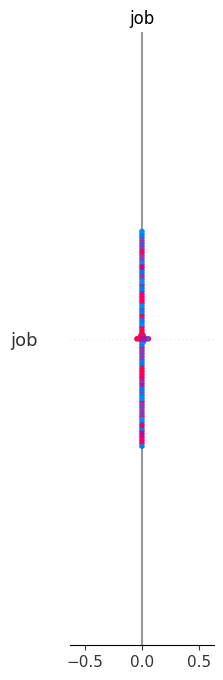

In [34]:
# --- Model Explainability with SHAP ---
import shap
import pandas as pd
shap.initjs()

# Use a random sample of 100 rows from the test set for faster computation
sample_size = min(100, X_test_nn.shape[0])

# Ensure X_train_nn and X_test_nn are DataFrames with correct columns
if not isinstance(X_train_nn, pd.DataFrame):
    X_train_nn_df = pd.DataFrame(X_train_nn, columns=X_train.columns)
else:
    X_train_nn_df = X_train_nn.copy()

if not isinstance(X_test_nn, pd.DataFrame):
    X_test_sample_df = pd.DataFrame(X_test_nn[:sample_size], columns=X_train.columns)
else:
    X_test_sample_df = X_test_nn.iloc[:sample_size].copy()

# Create SHAP KernelExplainer and compute SHAP values
explainer = shap.KernelExplainer(model.predict, X_train_nn_df[:sample_size])
shap_values = explainer.shap_values(X_test_sample_df)

# Summary plot for all features (on the sample)
shap.summary_plot(shap_values, X_test_sample_df)